# **Diabetes EDA and Classification**
### **Overview**

In this notebook, we're going to explore and analyze the Diabetes Prediction dataset from Kaggle, which consists of a variety of medical and demographic factors alongside the diabetes status of patients. The dataset includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

Our goal here is twofold. First, we aim to gain meaningful insights into the data by conducting an extensive Exploratory Data Analysis (EDA), where we will visualize the data to understand the distributions, patterns, relationships, and trends within. Additionally, we will examine correlations between features to understand their influence on the target variable - diabetes status.

Secondly, we'll utilize a selection of classification models to predict the likelihood of diabetes based on a patient's medical history and demographic information. We will train, tune, and evaluate multiple models, using a suite of metrics to assess their performance.

Here's a brief summary of what we'll cover:

***Data Loading and Exploration:*** Load the data and get an initial understanding of the dataset.

***Exploratory Data Analysis (EDA):*** Visualize the data through various plots and charts to understand the distributions and correlations of the features.

***Data Preprocessing:*** Perform encoding and scaling on features if necessary.

***Model Selection and Training:*** Test a variety of classification models to fit the data. Each model will be incorporated into a separate pipeline. Each model will be optimized using GridSearchCV

***Model Evaluation:*** With our models trained, we'll evaluate them using suitable metrics such as accuracy, precision, recall, F1-score, ROC AUC, and the Confusion Matrix. The metrics will provide a detailed and comprehensive view of our models' performance on the classification task.

***Results and Interpretation:*** Analyze and interpret the results of the best model(s), focusing on which features are most influential in predicting diabetes.

##**Import all required libraries**

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay,confusion_matrix

##**Data Loading and Exploration**

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27528 entries, 0 to 27527
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               27528 non-null  object 
 1   age                  27528 non-null  float64
 2   hypertension         27528 non-null  int64  
 3   heart_disease        27528 non-null  int64  
 4   smoking_history      27528 non-null  object 
 5   bmi                  27528 non-null  float64
 6   HbA1c_level          27528 non-null  float64
 7   blood_glucose_level  27528 non-null  int64  
 8   diabetes             27528 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,27528.0,42.005618,22.498018,0.08,24.00,43.00,60.00,80.00
hypertension,27528.0,0.077194,0.266904,0.00,0.00,0.00,0.00,1.00
heart_disease,27528.0,0.038797,0.193114,0.00,0.00,0.00,0.00,1.00
bmi,27528.0,27.369845,6.682188,10.01,23.71,27.32,29.61,88.72
HbA1c_level,27528.0,5.524415,1.078814,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,27528.0,138.018817,40.993501,80.00,100.00,140.00,159.00,300.00
diabetes,27528.0,0.085731,0.279971,0.00,0.00,0.00,0.00,1.00


In [6]:
# Check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# Check for duplicated rows
duplicates = df.duplicated()
print(duplicates.sum())

324


In [8]:
# Remove duplicate rows from the dataframe
df = df.drop_duplicates()

In [9]:
# Check for unique values in each column
unique_values = df.nunique()
print(unique_values)

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    3418
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64


In [10]:
 # Loop through the columns to get unique values
 for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

gender: ['Female' 'Male' 'Other']

age: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]

hypertension: [0 1]

heart_disease: [1 0]

smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']

bmi: [25.19 27.32 23.45 ... 44.72 54.89 41.35]

HbA1c_level: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]

blood_glucose_level: [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 

#### Noticed that gender consists of 'Other', and upon checking the number, noticed it was quite low, and deecided to remove the rows where gender = 'Other'

In [11]:
df['gender'].value_counts()

Female    15965
Male      11234
Other         5
Name: gender, dtype: int64

In [12]:
df = df[df['gender'] != 'Other']

In [13]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

### Noticed in the 'smoking_history' column, there is a high number of 'No Info' values, and in this case it can be classified as missing values, therefore I removed the column

In [14]:
df['smoking_history'].value_counts()

never          9735
No Info        9478
former         2628
current        2535
not current    1738
ever           1085
Name: smoking_history, dtype: int64

In [15]:
df = df.drop('smoking_history',axis=1)

In [16]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


In [17]:
# Convert 'age' column from float to int
df['age'] = df['age'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27199 entries, 0 to 27527
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               27199 non-null  object 
 1   age                  27199 non-null  int64  
 2   hypertension         27199 non-null  int64  
 3   heart_disease        27199 non-null  int64  
 4   bmi                  27199 non-null  float64
 5   HbA1c_level          27199 non-null  float64
 6   blood_glucose_level  27199 non-null  int64  
 7   diabetes             27199 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.9+ MB


##**Exploratory Data Analysis (EDA)**

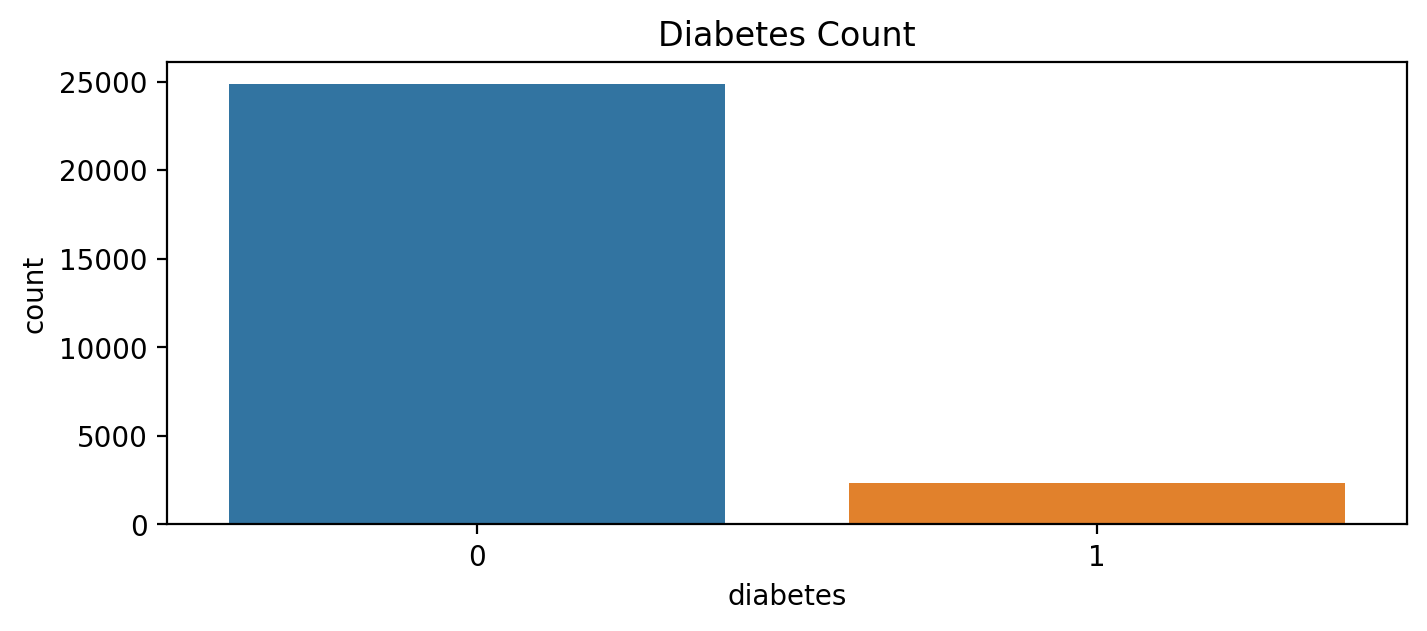

In [19]:
# Countplot for diabetes
plt.figure(figsize=(8,3),dpi=200)
sns.countplot(data=df, x='diabetes')
plt.title('Diabetes Count')
plt.show();

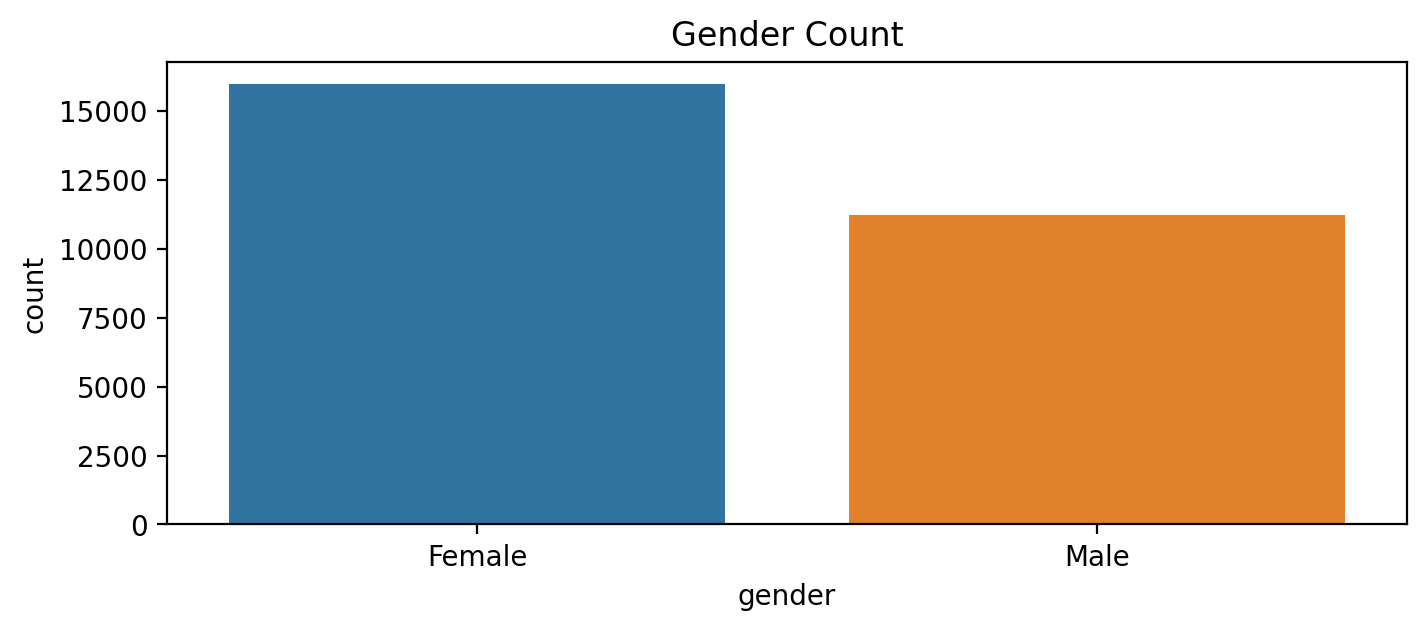

In [20]:
# Countplot for gender
plt.figure(figsize=(8,3),dpi=200)
sns.countplot(data=df,x='gender')
plt.title('Gender Count')
plt.show();

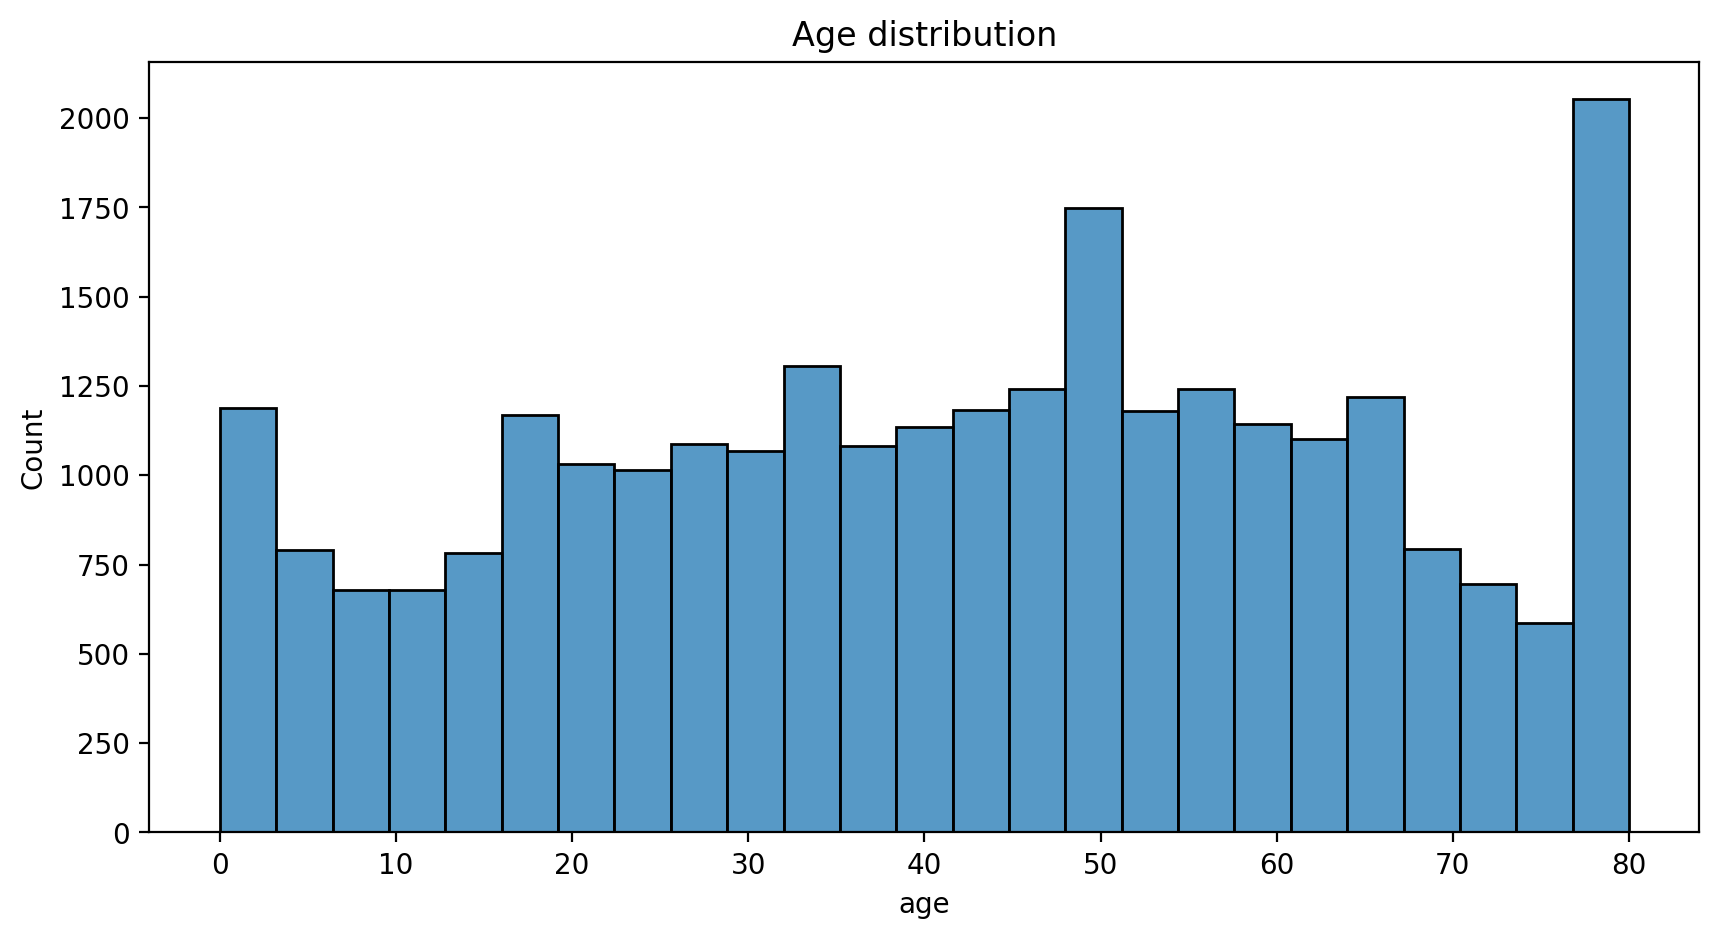

In [21]:
# Histogram of age distribution
plt.figure(figsize=(10,5),dpi=200)
sns.histplot(data=df,x='age',bins = 25)
plt.title('Age distribution')
plt.show();

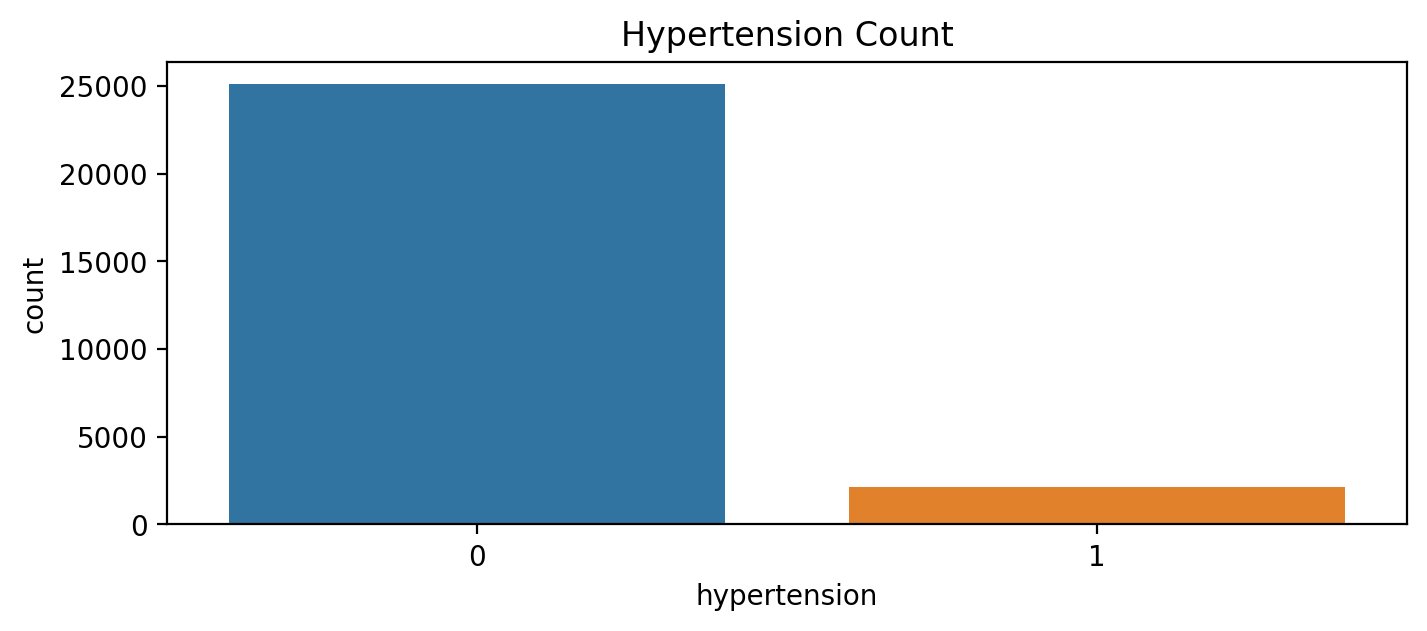

In [22]:
# Countplot for hypertension
plt.figure(figsize=(8,3),dpi=200)
sns.countplot(data=df, x='hypertension')
plt.title('Hypertension Count')
plt.show();

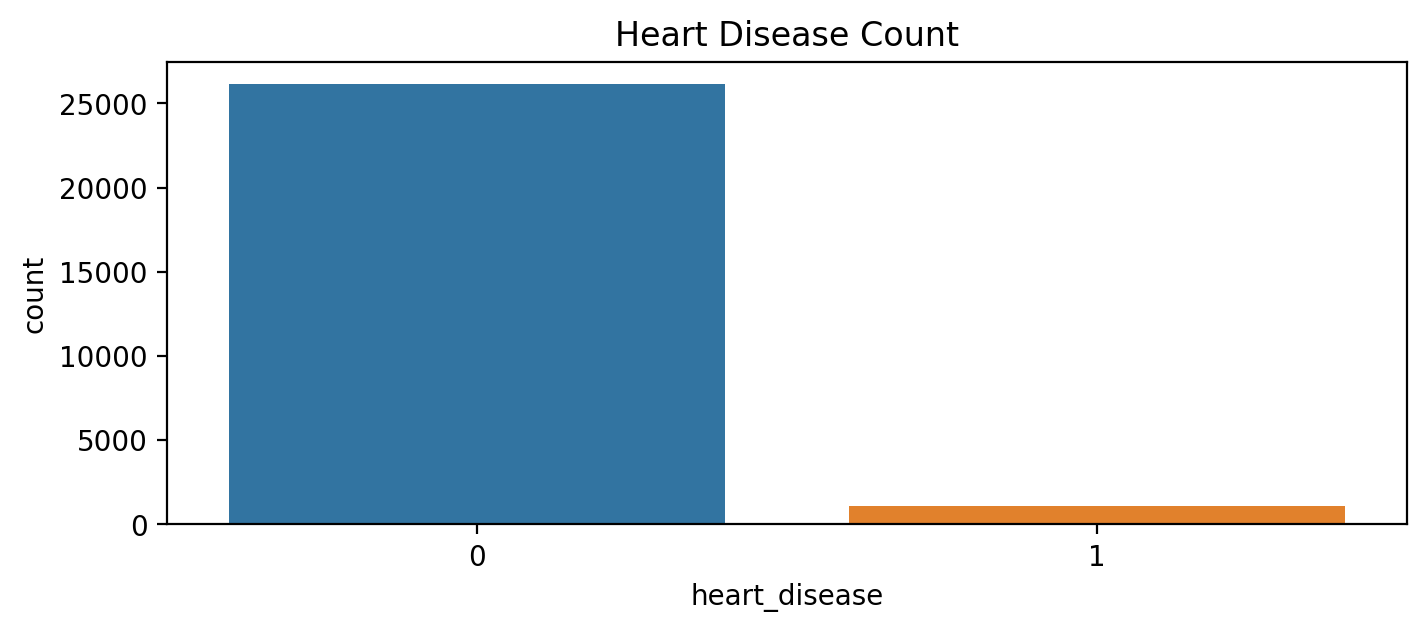

In [23]:
# Countplot for heart disease
plt.figure(figsize=(8,3),dpi=200)
sns.countplot(data=df, x='heart_disease')
plt.title('Heart Disease Count')
plt.show();

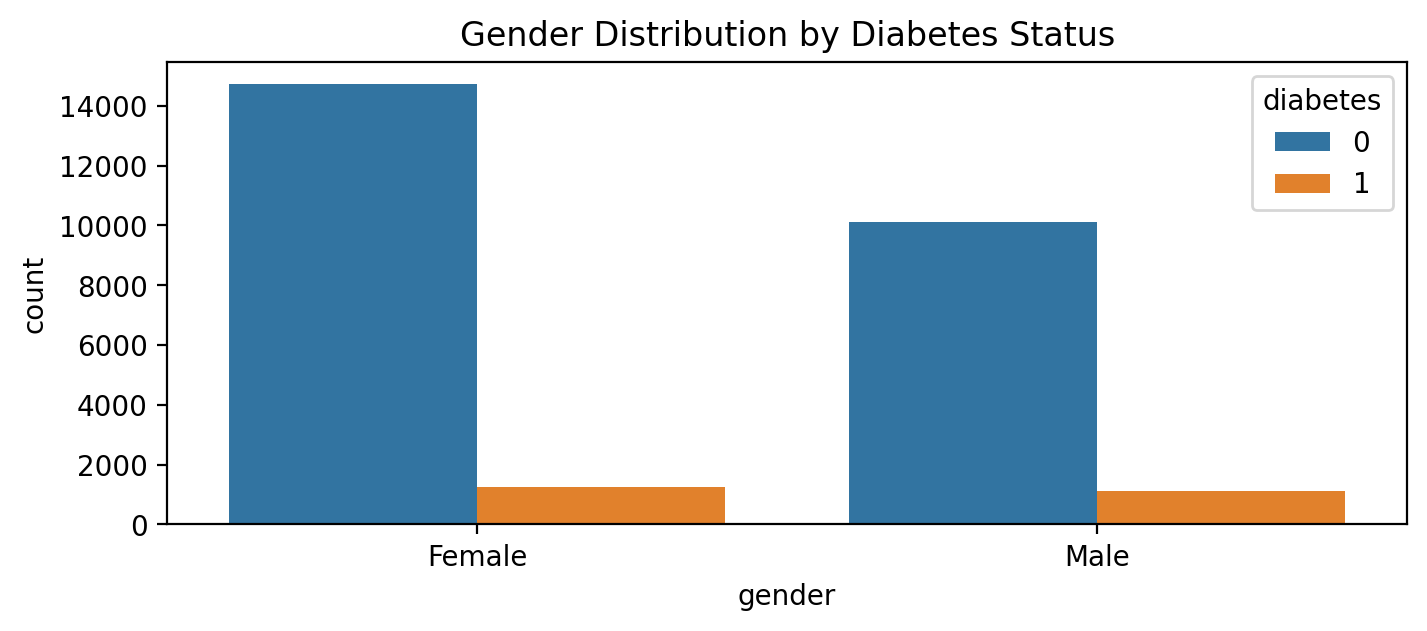

In [24]:
# Countplot to compare Diabetes across genders
plt.figure(figsize=(8,3),dpi=200)
sns.countplot(data = df, x='gender', hue='diabetes')
plt.title('Gender Distribution by Diabetes Status')
plt.show();

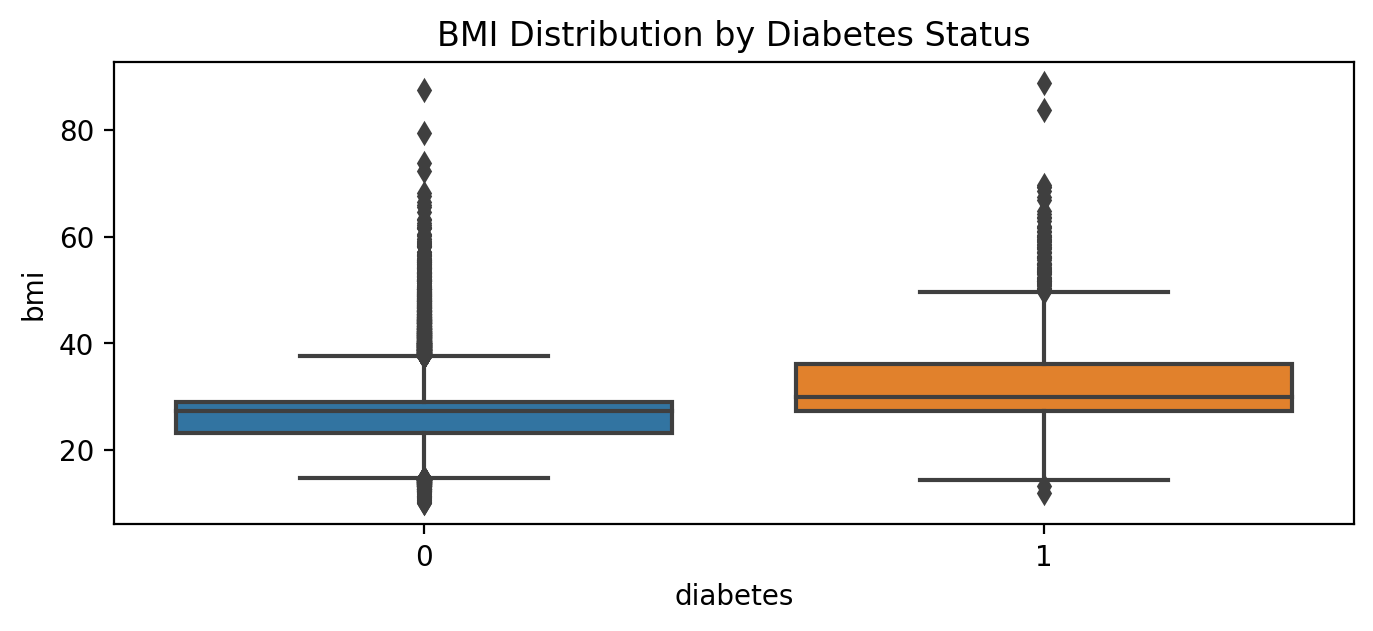

In [25]:
# Boxplot showing BMI distribution by Diabetes status
plt.figure(figsize=(8,3),dpi=200)
sns.boxplot(data=df,x='diabetes', y='bmi')
plt.title('BMI Distribution by Diabetes Status')
plt.show();

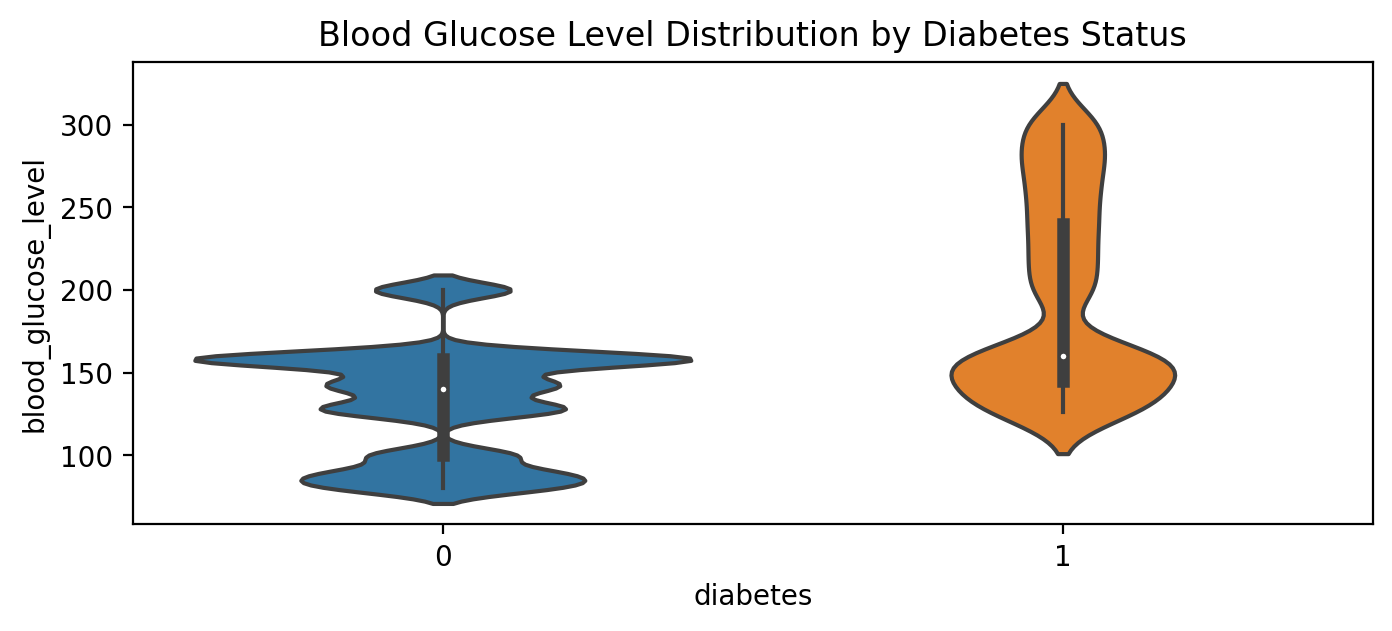

In [26]:
# Violinplot showing Blood glucose level by Diabetus status
plt.figure(figsize=(8,3),dpi=200)
sns.violinplot(data=df, x='diabetes', y='blood_glucose_level')
plt.title('Blood Glucose Level Distribution by Diabetes Status')
plt.show();

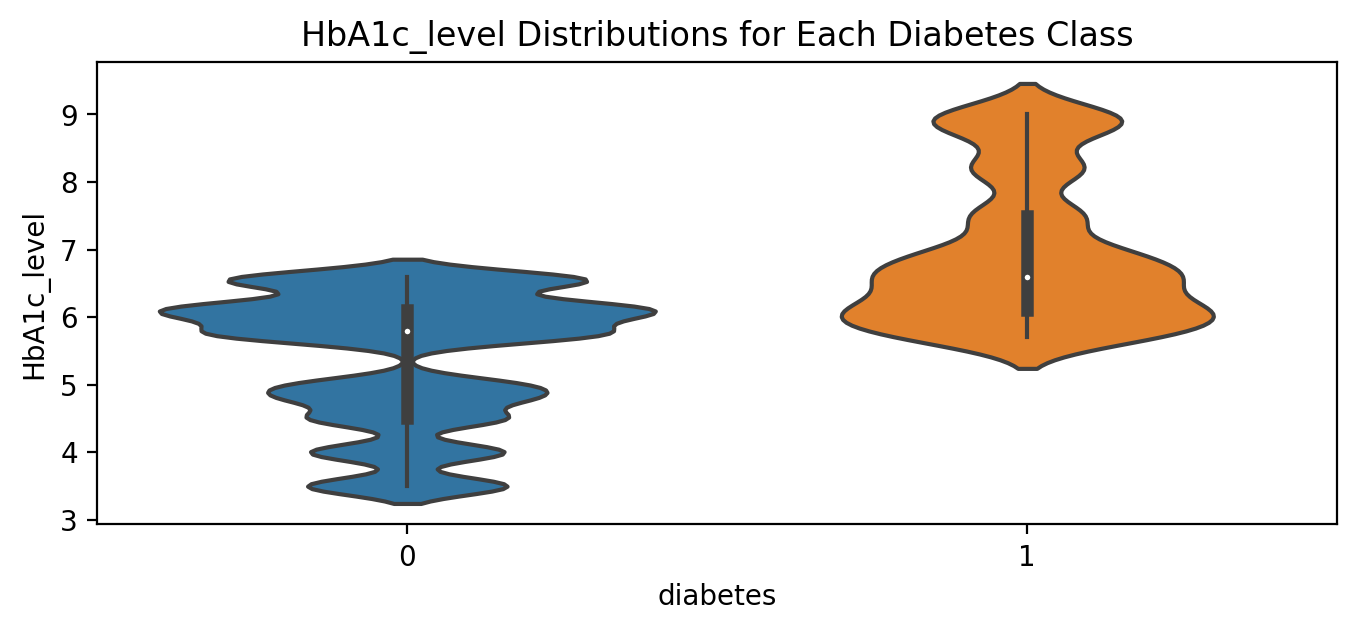

In [27]:
# Violin plot showing HbA1c level distribution against diabetes
plt.figure(figsize=(8,3),dpi=200)
sns.violinplot(data=df,x='diabetes', y='HbA1c_level')
plt.title('HbA1c_level Distributions for Each Diabetes Class')
plt.show()

<Figure size 1600x600 with 0 Axes>

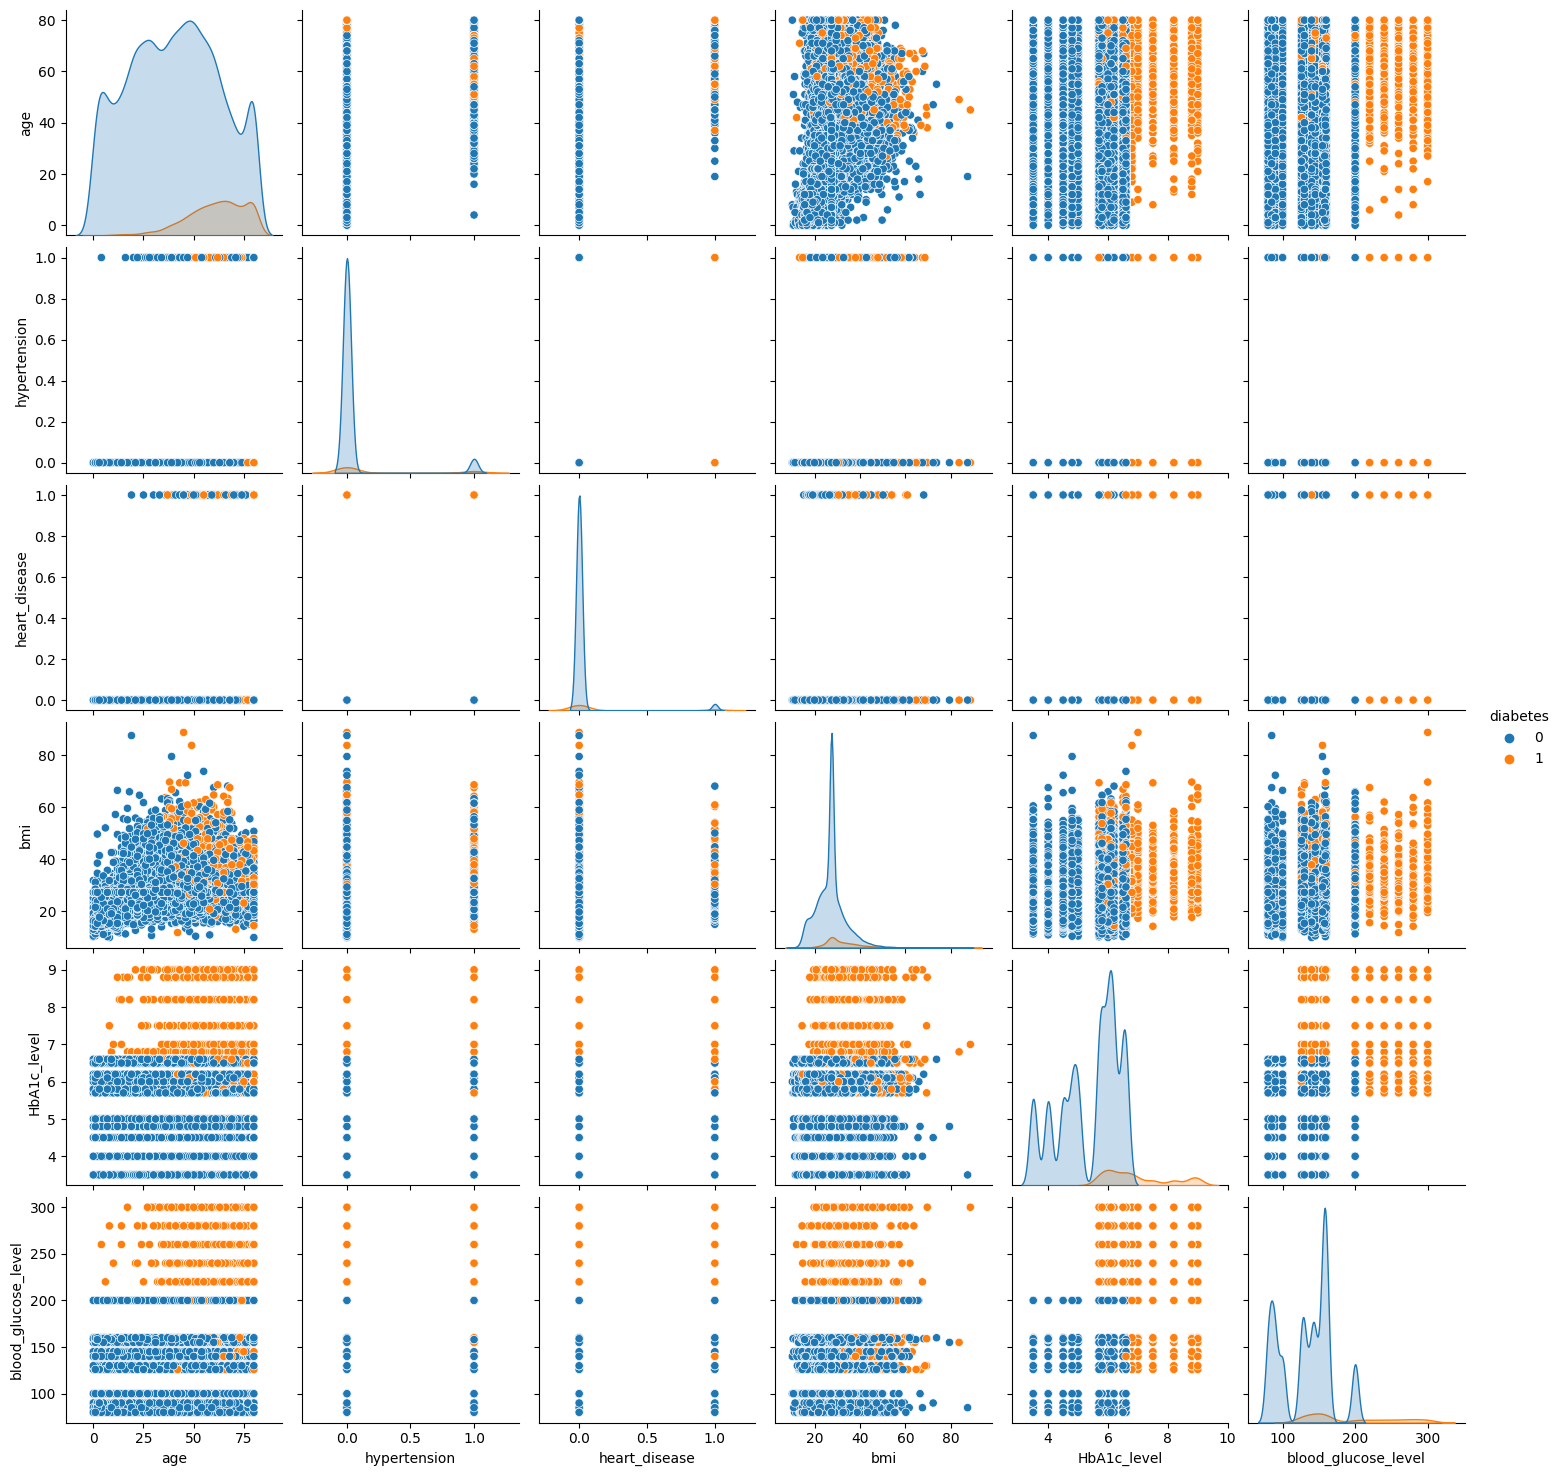

In [28]:
# Pair plot for all numeric features
plt.figure(figsize=(8,3),dpi=200)
sns.pairplot(data=df, hue='diabetes')
plt.show()

##**Data Preprocessing**

In [33]:
# One hot encode 'Gender' column
df = pd.get_dummies(data=df, columns=['gender'],drop_first=True)

In [34]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male
0,80,0,1,25.19,6.6,140,0,0
1,54,0,0,27.32,6.6,80,0,0
2,28,0,0,27.32,5.7,158,0,1
3,36,0,0,23.45,5.0,155,0,0
4,76,1,1,20.14,4.8,155,0,1


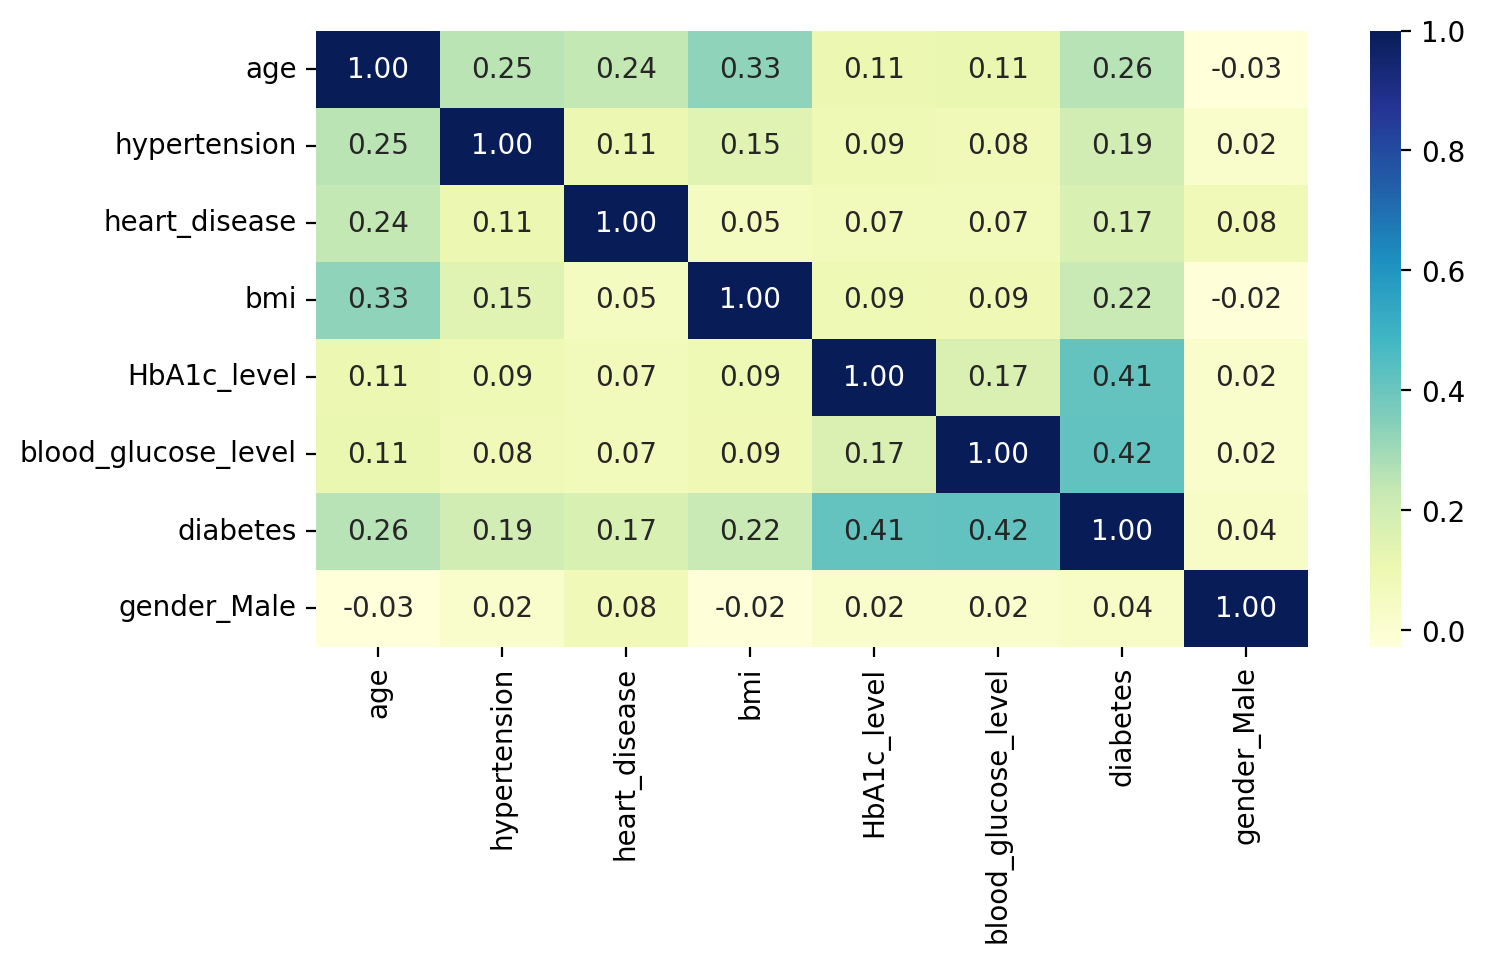

In [40]:
# Correlation Matrix
corr = df.corr()

# Draw the heatmap
plt.figure(figsize=(8,4),dpi=200)
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

In [35]:
# Split into features and labels
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [36]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##**Model Selection and Training - Logistic Regression**

In [44]:
# Logistic Regression
pipe_lr = Pipeline([('scaler',StandardScaler()),
                    ('lr',LogisticRegression())])

C = np.logspace(0, 4, 10)

# Define parameters grid
param_grid = [{'lr__penalty':['None','l1','l2','elasticnet'],
               'lr__C':C,
               'lr__solver':['liblinear','sag','saga','lbfgs']}]

# Define GridSearchCV
grid_lr = GridSearchCV(pipe_lr,param_grid,cv=5)
grid_lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/d

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid=[{'lr__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'lr__penalty': ['None', 'l1', 'l2', 'elasticnet'],
                          'lr__solver': ['liblinear', 'sag', 'saga', 'lbfgs']}])

In [46]:
print("Logistic Regression Best Parameters: ", grid_lr.best_params_)

Logistic Regression Best Parameters:  {'lr__C': 1.0, 'lr__penalty': 'l2', 'lr__solver': 'saga'}


##**Model Selection and Training - Random Forest**

In [50]:
# Random Forest
pipe_rf = Pipeline([('rfc',RandomForestClassifier())])

# Define parameters grid
param_grid = [{'rfc__n_estimators':[10,50,100,150],
               'rfc__criterion':['gini','entropy','log_loss'],
               'rfc__max_features':[2,3,4,5,6,7]}]

# Define GridSearchCV
grid_rfc = GridSearchCV(pipe_rf,param_grid,cv=5)
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rfc', RandomForestClassifier())]),
             param_grid=[{'rfc__criterion': ['gini', 'entropy', 'log_loss'],
                          'rfc__max_features': [2, 3, 4, 5, 6, 7],
                          'rfc__n_estimators': [10, 50, 100, 150]}])

In [52]:
print("Random Forest Best Parameters: ", grid_rfc.best_params_)

Random Forest Best Parameters:  {'rfc__criterion': 'gini', 'rfc__max_features': 2, 'rfc__n_estimators': 50}


##**Model Selection and Training - KNN**

In [57]:
# K-Nearest Neighbor
pipe_knn = Pipeline([('scaler',StandardScaler()),
                     ('knn',KNeighborsClassifier())])

k_values = list(range(1,20))

# Define paramaters grid
param_grid = [{'knn__n_neighbors':k_values,
               'knn__weights':['uniform','distance']}]

# Define GridSearchCV
grid_knn = GridSearchCV(pipe_knn,param_grid,cv=5,scoring='accuracy')
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [58]:
print("KNN Best Parameters: ", grid_knn.best_params_)

KNN Best Parameters:  {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}


##**Model Evaluation - Logistic Regression**

In [61]:
y_pred_lr = grid_lr.predict(X_test)

In [72]:
# Accuracy
accuracy = accuracy_score(y_test,y_pred_lr)
print(f" Logistic Regression Accuracy: {accuracy}")

 Logistic Regression Accuracy: 0.9596813725490196


In [64]:
# Classification Report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7436
           1       0.89      0.62      0.73       724

    accuracy                           0.96      8160
   macro avg       0.93      0.81      0.86      8160
weighted avg       0.96      0.96      0.96      8160



In [67]:
# ROC AUC
roc_auc = roc_auc_score(y_test,y_pred_lr)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.8083219903768141


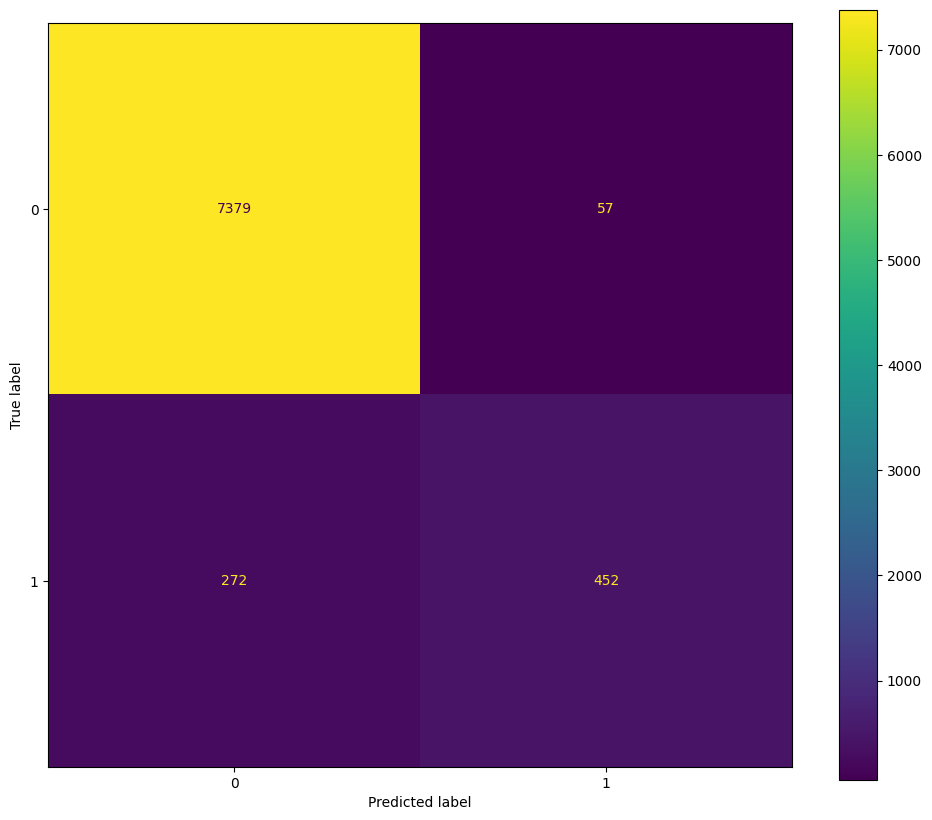

In [79]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_lr)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(12,10))
cmp.plot(ax=ax);

##**Model Evaluation - Random Forest**

In [80]:
y_pred_rf = grid_rfc.predict(X_test)

In [81]:
# Accuracy
accuracy = accuracy_score(y_test,y_pred_rf)
print(f" Random Forest Accuracy: {accuracy}")

 Random Forest Accuracy: 0.9677696078431373


In [82]:
# Classification Report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7436
           1       0.95      0.67      0.79       724

    accuracy                           0.97      8160
   macro avg       0.96      0.83      0.88      8160
weighted avg       0.97      0.97      0.97      8160



In [83]:
# ROC AUC
roc_auc = roc_auc_score(y_test,y_pred_rf)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.8339543478196262


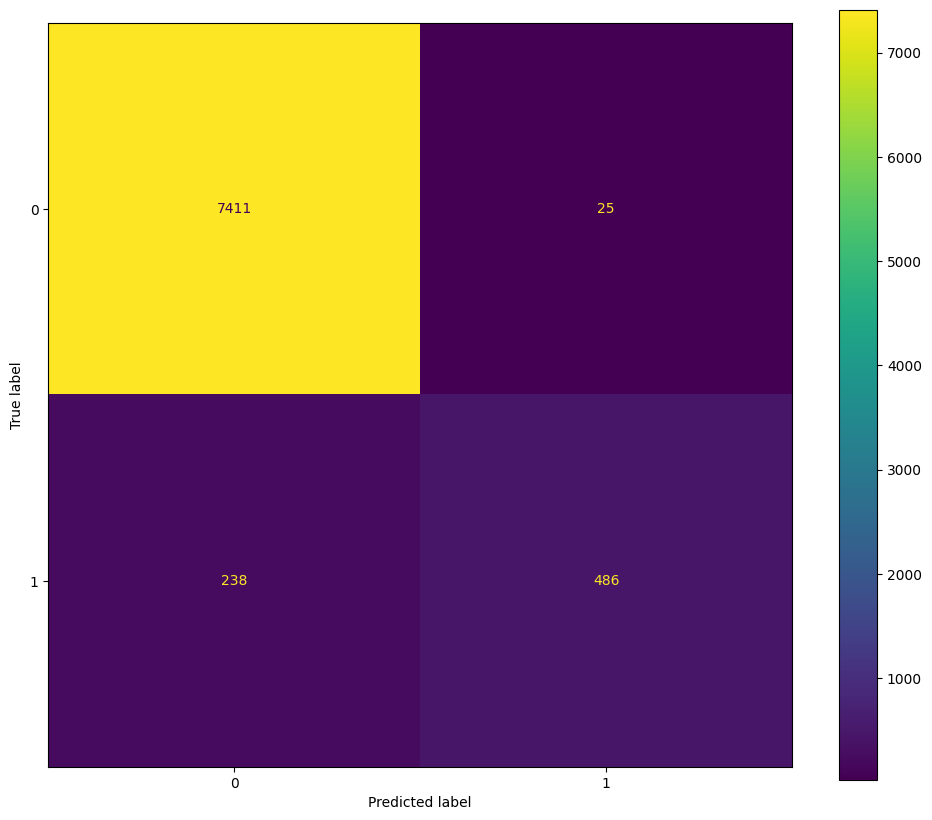

In [84]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_rf)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(12,10))
cmp.plot(ax=ax);

##**Model Evaluation - K-Nearest Neighbor**

In [85]:
y_pred_knn = grid_knn.predict(X_test)

In [86]:
# Accuracy
accuracy = accuracy_score(y_test,y_pred_knn)
print(f" Random Forest Accuracy: {accuracy}")

 Random Forest Accuracy: 0.9623774509803922


In [87]:
# Classification Report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7436
           1       0.96      0.60      0.74       724

    accuracy                           0.96      8160
   macro avg       0.96      0.80      0.86      8160
weighted avg       0.96      0.96      0.96      8160



In [88]:
# ROC AUC
roc_auc = roc_auc_score(y_test,y_pred_knn)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.7979573019415773


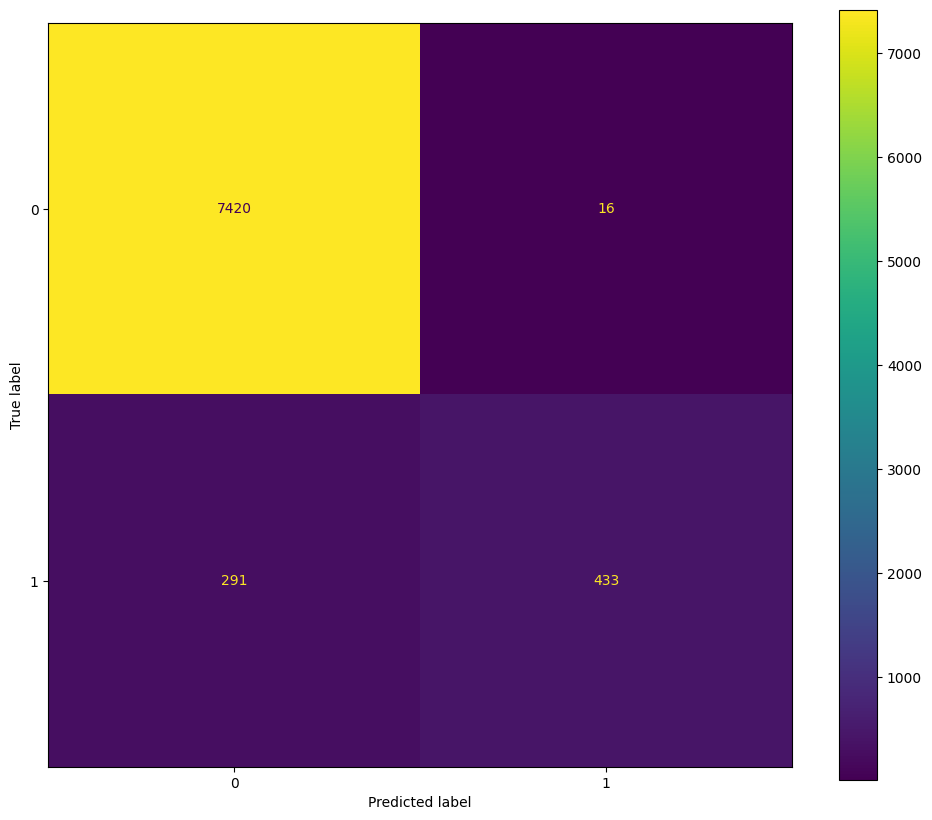

In [89]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_knn)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(12,10))
cmp.plot(ax=ax);

##**Results and Interpretation - Logistic Regression**

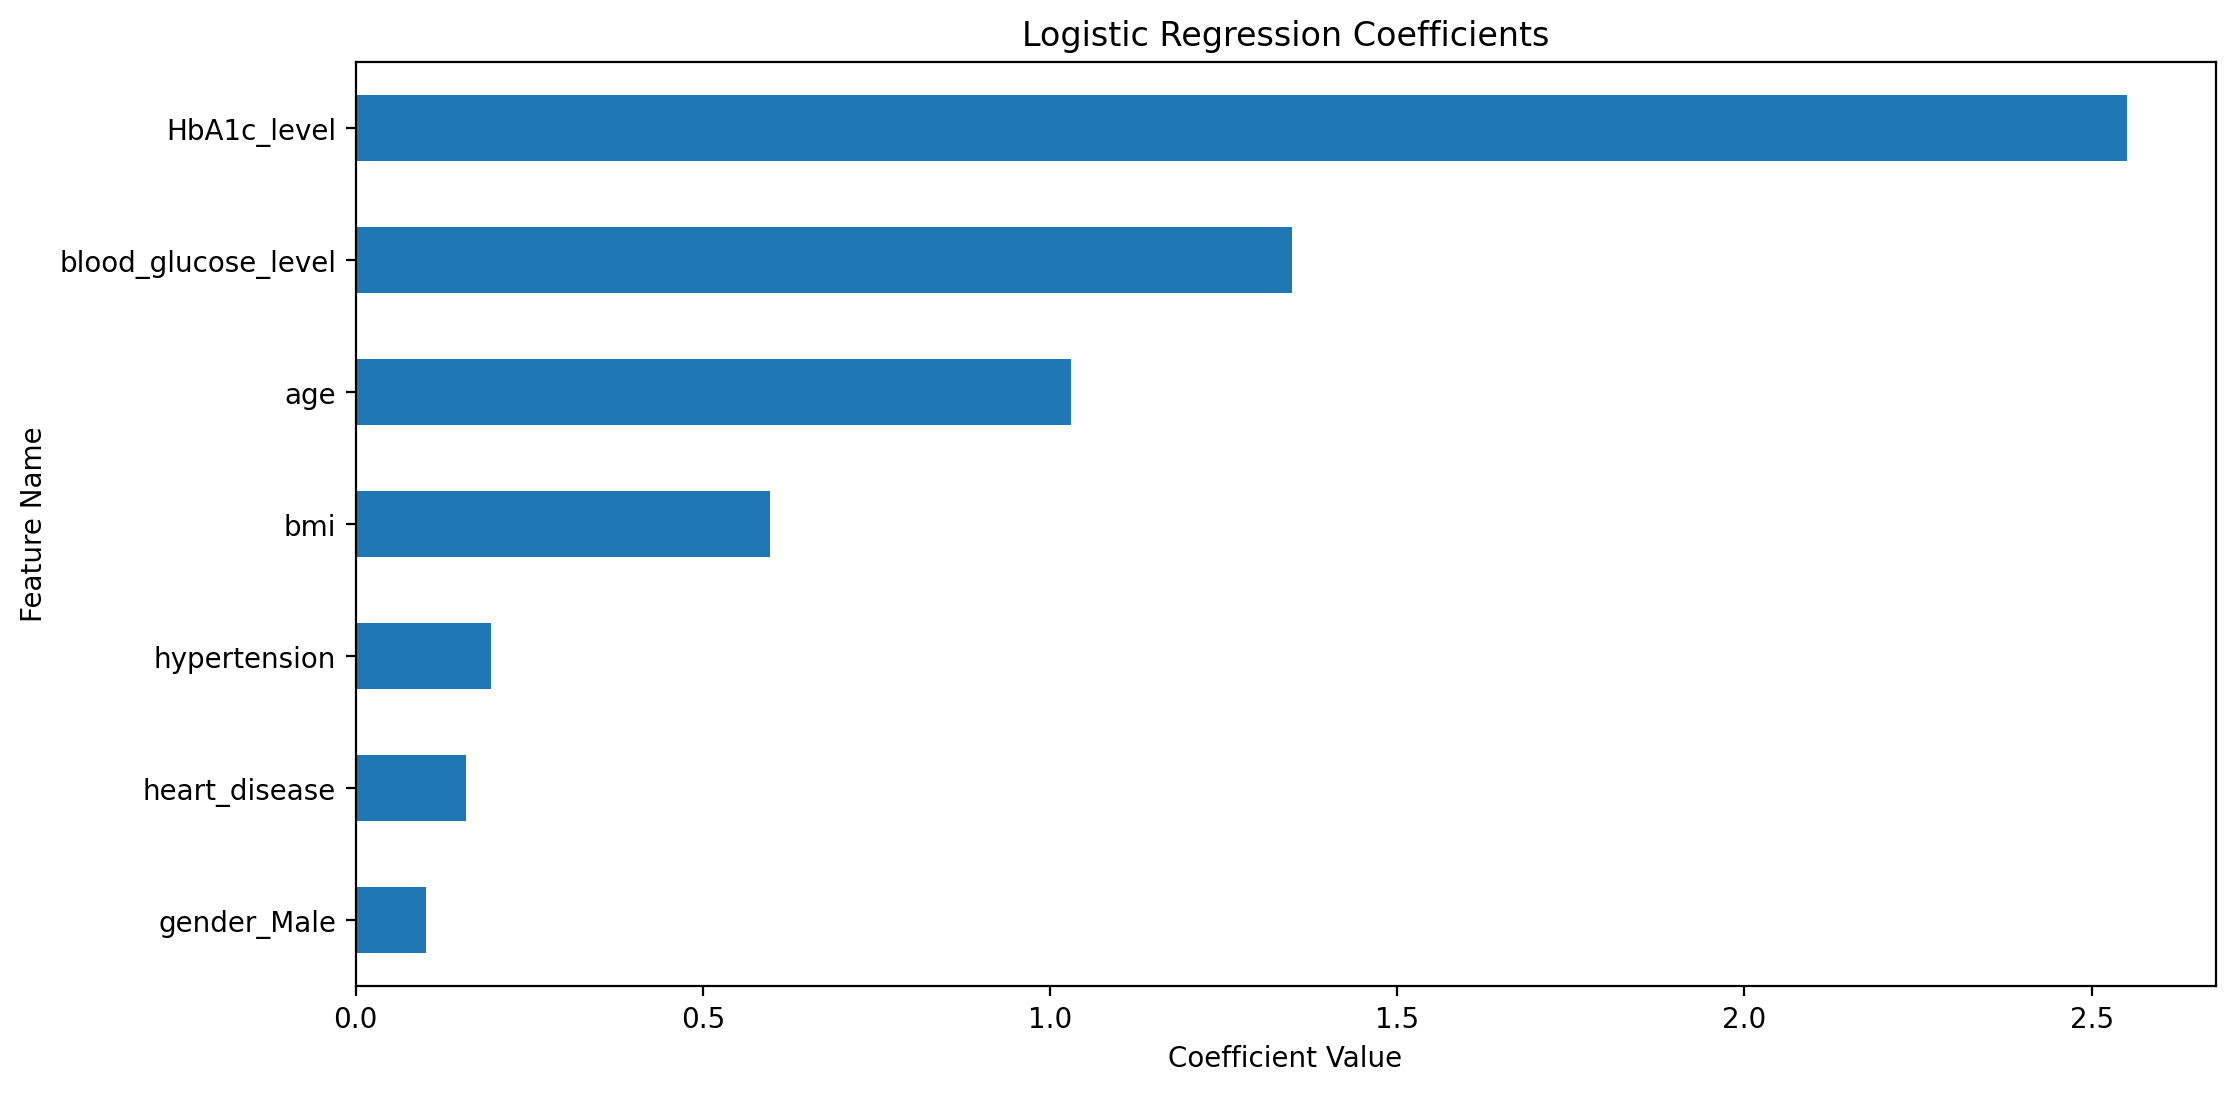

In [94]:
# Get the feature names
feature_names = X_train.columns.tolist()

# Get the best model after hyperparameter search
best_model = grid_lr.best_estimator_.named_steps['lr']

# Get the coefficients
coefficients = best_model.coef_[0]

# Match coefficients to features
feature_importances = pd.Series(coefficients, index=feature_names)

# Plot the feature importances
plt.figure(figsize=(12, 6),dpi=200)
feature_importances.sort_values().plot(kind='barh')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()

##**Results and Interpretation - Random Forest**

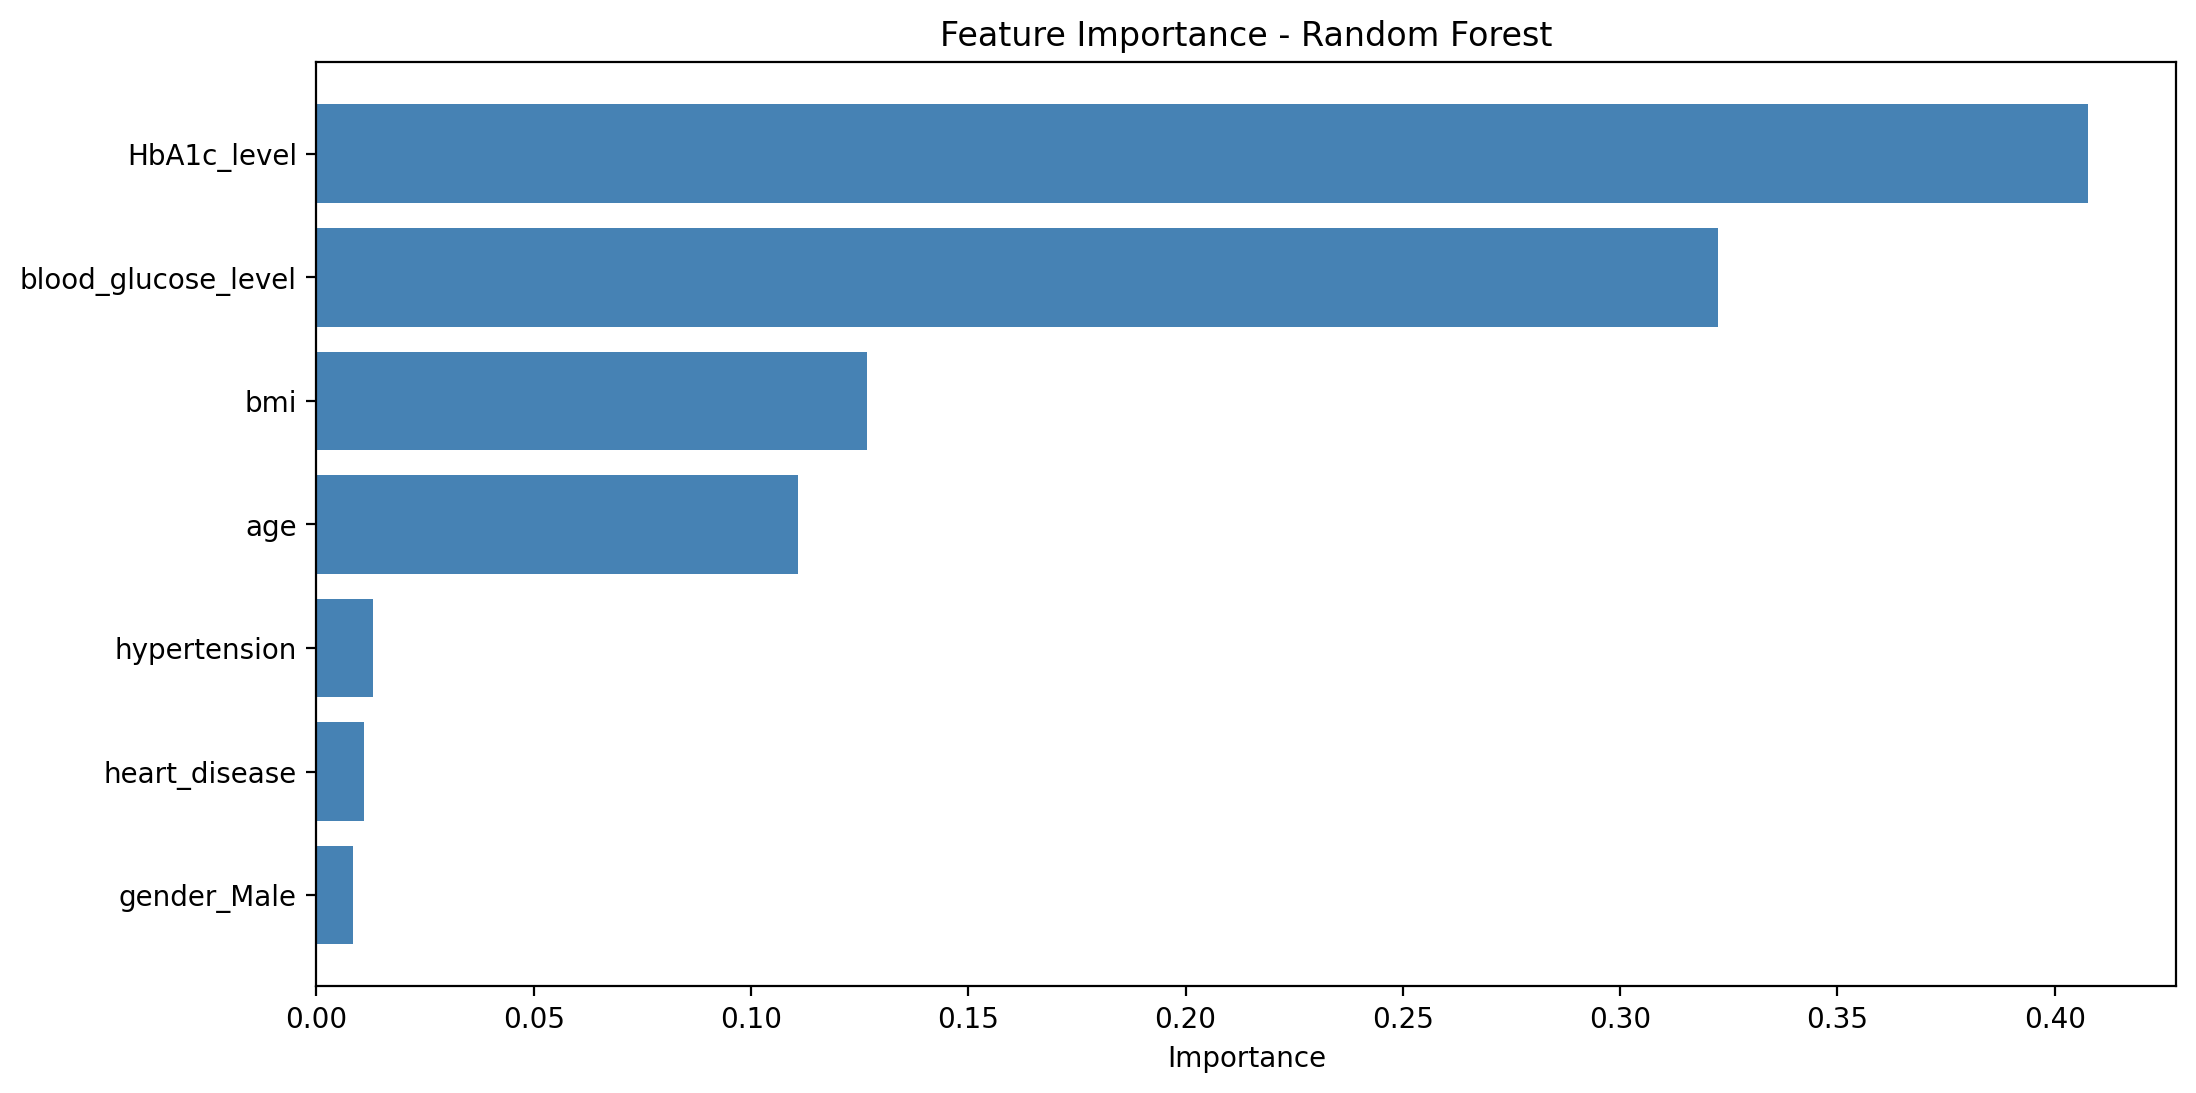

In [102]:
# Get the best model
best_model_rf = grid_rfc.best_estimator_.named_steps['rfc']

# Get feature importances from the Random Forest model
feature_importances_rf = best_model_rf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for easy visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_rf
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Create a bar plot
plt.figure(figsize=(12,6),dpi=200) # specify the size of the plot
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

##**Results and Interpretation - K-Nearest Neighbor**

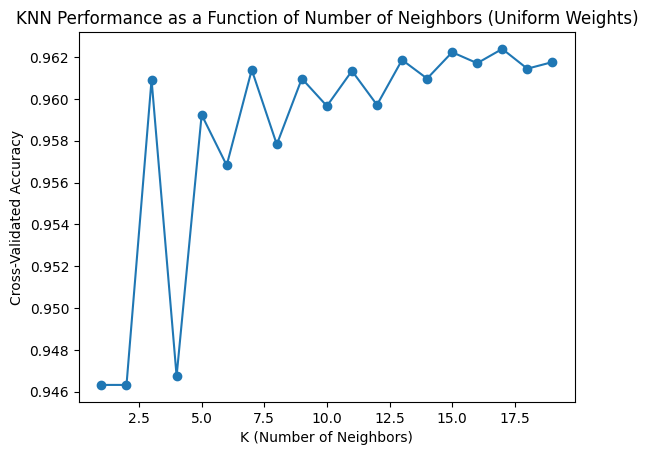

In [104]:
k_values = param_grid[0]['knn__n_neighbors']
weights_values = param_grid[0]['knn__weights']

scores_matrix = np.array(scores).reshape(len(weights_values), len(k_values))
scores_uniform = scores_matrix[weights_values.index('uniform')]

plt.plot(k_values, scores_uniform, 'o-')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Performance as a Function of Number of Neighbors (Uniform Weights)")
plt.show()